# 神经网络

### 导入包

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.optim as optim
import pandas as pd
from my_tools import *

In [2]:
# 忽略warning
import warnings
warnings.filterwarnings("ignore")

### 读取数据

In [3]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

### 归一化

In [4]:
jibing = guiyihua(jibing)

### 标准化

In [5]:
jibing = biaozhunhua(jibing)

In [6]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,1,0,3,0,-0.634697,0,0,0,1,-0.450418,...,-0.396096,-0.010001,-0.138369,-0.540229,-0.388337,0.565581,1.799019,-0.579652,-0.340355,0
1,1,0,4,0,0.699734,0,0,0,0,2.220159,...,-0.396096,-0.070029,-0.111576,-0.306733,1.067354,1.545136,-0.352195,-1.836937,0.265728,2
2,1,0,4,0,-2.191532,0,0,0,0,-0.450418,...,-0.686176,-0.079264,-0.218748,-0.656976,-0.520673,-0.626921,-0.284440,1.232798,1.037105,0
3,1,0,4,1,-0.041616,0,0,0,1,-0.450418,...,-0.976257,0.008469,0.049182,-0.773724,-0.123666,-0.499153,1.494123,2.914620,1.830522,0
4,1,0,4,1,-0.560562,0,0,0,1,-0.450418,...,-0.396096,-0.067720,-0.087462,-0.073237,-0.653008,0.608170,0.410046,0.383722,0.739574,3


### 将 DataFrame 转换为 Tensor

In [7]:
jibing = torch.Tensor(jibing.values)
jibing_res = torch.Tensor(jibing_res.values)

In [8]:
jibing_res = jibing_res.long()

In [9]:
jibing_res

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [10]:
jibing_res[1]

tensor([0])

### 定义模型

In [11]:
# 模型（网络）
model = nn.Sequential(
    nn.Linear(60,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Linear(100,50),
    nn.ReLU(),
    nn.Linear(50,2),
    nn.Softmax()
)

### 定义一个 epoch

In [12]:
def train(X,Y,model,batch_size,loss,optimizer):
    # 计算批次
    batch_num = int(X.shape[0]/batch_size)
    for step in range(batch_num):
        # 划分 batch
        X_batch=X[step*batch_size:(step+1)*batch_size]
        Y_batch=Y[step*batch_size:(step+1)*batch_size]

        # 计算预测值
        Y_hat = model(X_batch)
        # 计算loss
        l = loss(Y_hat,Y_batch.reshape(-1)).sum()
        # 梯度置为0
        optimizer.zero_grad()
        # 反向传播
        l.backward()
        # 梯度下降
        optimizer.step()

        accuracy = (Y_hat.argmax(axis=1)==Y_batch.reshape(-1)).sum()/Y_batch.shape[0]
    return (l,accuracy)

In [13]:
# 优化器，loss函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
loss = nn.CrossEntropyLoss()
# 保存 loss，accuracy
loss_s,accuracy_s=[],[]
epoch_num = 600
loss_s = []
accuracy_s = []
# 训练epochs
for i in range(epoch_num):
    loss_,accuracy_ = train(jibing,jibing_res,model,1000,loss,optimizer)
    if i % 10 == 0:
        loss_s.append(loss_)
        accuracy_s.append(accuracy_)

In [14]:
index = np.linspace(1,60,60)
loss_s[1].detach().numpy()

array(0.7177414, dtype=float32)

In [15]:
for i in range(len(loss_s)):
    loss_s[i] = loss_s[i].detach().numpy()
for i in range(len(accuracy_s)):
    accuracy_s[i] = accuracy_s[i].detach().numpy()

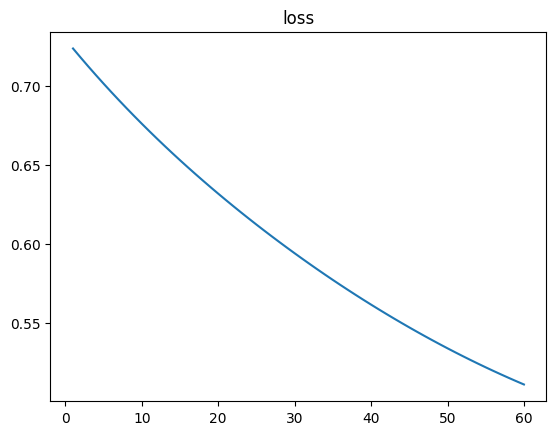

In [16]:
zhexiantu(index,loss_s,"loss")

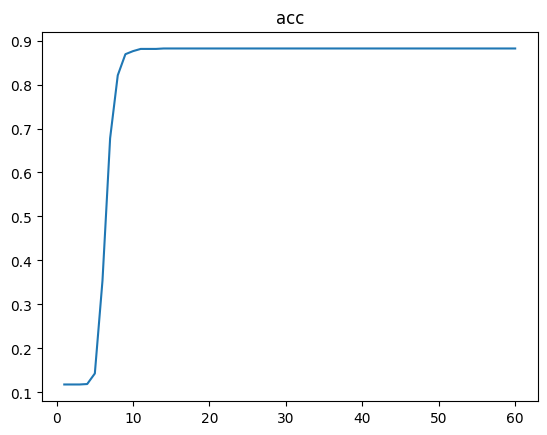

In [17]:
zhexiantu(index,accuracy_s,"acc")